In [891]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as D
import os
import multiprocessing as mp
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import cv2
from colour import Color

In [892]:
# class Network(nn.Module):
#     def __init__(self, n_feature, n_hidden, n_output):
#         super(Network, self).__init__()
#         self.fc = torch.nn.Linear(n_feature, n_hidden)
#         self.out = torch.nn.Linear(n_hidden, n_output)

#     def forward(self, x):
#         x = F.relu(self.fc(x))
#         x = self.out(x)
#         x = F.sigmoid(x)
#         x = 100*x
#         return x

In [893]:
# fig = np.load("nancatch400fig.np.npy")

In [894]:
# print(np.shape(fig))

In [895]:
# 初始化模型
# filestr='./modelV'
# network = torch.load(filestr)

In [896]:
# Zero = network(torch.FloatTensor(np.zeros(21))).detach().numpy()

In [897]:
# print(Zero)

In [898]:
eps = 0.00002

In [899]:
# fig = fig.reshape((8,900*1800))
# for i in range(8):
# # for i in [1]:
#     print(fig[i][:5])
#     maxx = np.max(fig[i])
#     print(maxx)
#     for j in range(900*1800):
#         if fig[i][j] > Zero[i] - eps and fig[i][j] < Zero[i] + eps:
#             fig[i][j] = 0
#         else :
#             fig[i][j] = fig[i][j]*100/maxx
#     print(fig[i][:5])
# fig = fig.reshape((8,900,1800))

In [900]:
# np.save("dezero400fig.np",fig)

In [901]:
fig = np.load("dezero400fig.np.npy")

In [902]:
# 滤波器参数
door_of_images = (80,20,25,23,23,20,0.55,0.2)
baseline_of_images = (40,)

In [903]:
density_range = 100
img_width = 1800
img_height = 900
cmap = plt.get_cmap("rainbow") # 使用matplotlib获取颜色梯度
blue = Color("blue") # 使用Color来生成颜色梯度
hex_colors = list(blue.range_to(Color("red"), density_range))
rgb_colors = [[rgb * 255 for rgb in color.rgb] for color in hex_colors][::-1]

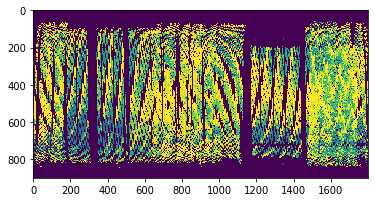

In [904]:
label = 1
door = 20
# baseline = 40
img = fig[label].reshape((900*1800))
for i in range(900*1800):
    if img[i] >= door:
        img[i] = 99
    # elif img[i] < eps and img[i] > -eps:
    #     img[i] = 0
    else :
        img[i] = img[i]*99/door
        # img[i] = max((img[i]-baseline)*99/(door-baseline),0)
img = img.reshape((900,1800))
plt.imshow(img)
plt.imsave('/mnt/c/Users/shizh/Downloads/aimg'+str(label)+'dezore'+str(door)+'.png',img)

In [905]:
color_map = np.empty([img_height, img_width, 3], dtype=int)
for i in range(900):
    for j in range(1800):
        for k in range(3):
            color_map[i][j][k] = rgb_colors[int(img[i][j])][k]

In [906]:
print(np.shape(color_map))

(900, 1800, 3)


In [907]:
cv2.imwrite('colormap'+str(label)+str(door)+'.png',color_map)
heatmap = cv2.imread('colormap'+str(label)+str(door)+'.png')
if heatmap is None:
    print('open file 2 error!')
cv2.flip(heatmap,0 ,heatmap)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

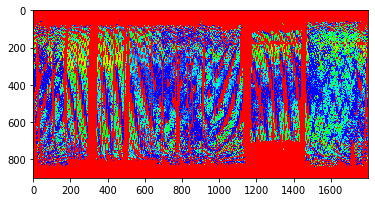

In [908]:
plt.imshow(heatmap)

In [909]:
frame = cv2.imread('surface2.jpg')
if frame is None:
    print('open file error!')

In [910]:
alpha = 0.7 # 设置覆盖图片的透明度
cv2.addWeighted(heatmap, alpha, frame, 1-alpha, 0, frame) # 将热度图覆盖到原图


array([[[255,  76,  76],
        [255,  76,  76],
        [255,  76,  76],
        ...,
        [255,  76,  76],
        [255,  76,  76],
        [255,  76,  76]],

       [[255,  76,  76],
        [211,  33,  33],
        [211,  32,  32],
        ...,
        [212,  33,  33],
        [211,  33,  33],
        [212,  33,  33]],

       [[255,  76,  76],
        [207,  29,  29],
        [208,  29,  29],
        ...,
        [208,  30,  30],
        [207,  29,  29],
        [208,  29,  29]],

       ...,

       [[255,  76,  76],
        [224,  45,  45],
        [222,  44,  44],
        ...,
        [224,  45,  45],
        [224,  45,  45],
        [224,  46,  46]],

       [[255,  76,  76],
        [224,  45,  45],
        [222,  44,  44],
        ...,
        [224,  45,  45],
        [224,  45,  45],
        [224,  45,  45]],

       [[255,  76,  76],
        [224,  45,  45],
        [222,  44,  44],
        ...,
        [224,  45,  45],
        [224,  45,  45],
        [224,  45,  45]]

In [911]:
cv2.imwrite('/mnt/c/Users/shizh/Downloads/acolorimg'+str(label)+str(door)+'.png',frame)

True

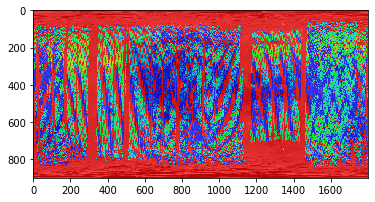

In [912]:
plt.imshow(frame)